In [1]:
from stitching import Stitcher
stitcher = Stitcher(detector="sift", confidence_threshold=0.3)

In [1]:
argv1 = '../data/test01.jpg'
argv2 = '../data/test02.jpg'

In [2]:
panorama = stitcher.stitch([argv1, argv2])

NameError: name 'stitcher' is not defined

In [3]:


import cv2
import numpy as np

def undistort_and_rotate(image_path, camera_matrix, dist_coeffs, angle, output_path):
    # 读取图像
    image = cv2.imread(image_path)
        # 获取新的相机矩阵
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (image.shape[1], image.shape[0]), 1, (image.shape[1], image.shape[0]))
    
    # 畸变矫正
    undistorted_image = cv2.undistort(image, camera_matrix, dist_coeffs, None, new_camera_matrix)
    
    # 裁剪图像
    x, y, w, h = roi
    undistorted_image = undistorted_image[y:y+h, x:x+w]
    
    # 获取图像中心
    (h, w) = undistorted_image.shape[:2]
    center = (w // 2, h // 2)
    
    # 旋转矩阵
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # 旋转图像并裁剪黑边
    rotated_image = cv2.warpAffine(undistorted_image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
    
    # 保存图像
    cv2.imwrite(output_path, rotated_image)
    print(f"Saved undistorted and rotated image: {output_path}")

# 相机矩阵（需要根据具体相机参数调整）
camera_matrix = np.array([[800, 0, 640], [0, 800, 360], [0, 0, 1]], dtype=np.float32)

# 畸变系数（需要根据具体情况调整）
dist_coeffs_list = [
    np.array([-0.401, 0.59999991, 0, 0], dtype=np.float32),
    np.array([-0.3, 0.2, 0, 0], dtype=np.float32),
    np.array([-0.0733, 0.0833, 0, 0], dtype=np.float32),
    np.array([-0.0733, 0.0833, 0, 0], dtype=np.float32),
    np.array([0.03, 0.00, 0, 0], dtype=np.float32)
]

# 旋转角度（可以根据需要调整）
rotation_angles = [-3.5865, 0, 0, 5]  # 示例角度，可以根据需要调整

for i in range(1, 5):
    image_path = f'../data/video{i}_frame1.jpg'
    dist_coeffs = dist_coeffs_list[i-1]
    angle = rotation_angles[i-1]
    output_path = f'undistorted_image{i}.png'
    undistort_and_rotate(image_path, camera_matrix, dist_coeffs, angle, output_path)




Saved undistorted and rotated image: undistorted_image1.png
Saved undistorted and rotated image: undistorted_image2.png
Saved undistorted and rotated image: undistorted_image3.png
Saved undistorted and rotated image: undistorted_image4.png


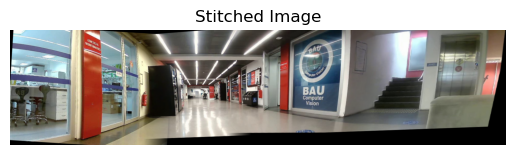

In [4]:


import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 定义输入和输出文件名
input_image1 = "undistorted_image1.png"
input_image2 = "output2.png"
output_image = "output3.png"

# 构建命令
command = ["./image_stitching", input_image1, input_image2, output_image]

# 使用subprocess运行命令
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # print("Command executed successfully.")
    # print("Output:\n", result.stdout.decode())
except subprocess.CalledProcessError as e:
    print("Error occurred while executing the command.")
    print("Error message:\n", e.stderr.decode())
    exit(1)  # 退出程序

# 使用Matplotlib加载和显示输出图片
img = mpimg.imread(output_image)
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.title("Stitched Image")
plt.show()

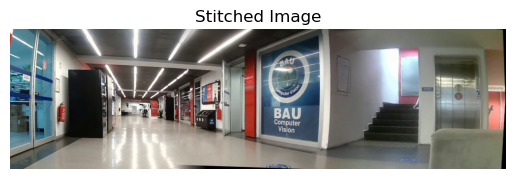

In [226]:


import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 定义输入和输出文件名
input_image1 = "undistorted_image3.png"
input_image2 = "undistorted_image4.png"
output_image = "output1.png"

# 构建命令
command = ["./image_stitching", input_image1, input_image2, output_image]

# 使用subprocess运行命令
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # print("Command executed successfully.")
    # print("Output:\n", result.stdout.decode())
except subprocess.CalledProcessError as e:
    print("Error occurred while executing the command.")
    print("Error message:\n", e.stderr.decode())
    exit(1)  # 退出程序

# 使用Matplotlib加载和显示输出图片
# img = mpimg.imread(output_image)
# plt.imshow(img)
# plt.axis('off')  # 关闭坐标轴
# plt.title("Stitched Image")
# plt.show()



# 定义输入和输出文件名
input_image1 = "undistorted_image2.png"
input_image2 = "output1.png"
output_image = "output2.png"

# 构建命令
command = ["./image_stitching", input_image1, input_image2, output_image]

# 使用subprocess运行命令
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # print("Command executed successfully.")
    # print("Output:\n", result.stdout.decode())
except subprocess.CalledProcessError as e:
    print("Error occurred while executing the command.")
    print("Error message:\n", e.stderr.decode())
    exit(1)  # 退出程序

# 使用Matplotlib加载和显示输出图片
img = mpimg.imread(output_image)
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.title("Stitched Image")
plt.show()

# # 定义输入和输出文件名
# input_image2 = "output2.png"
# input_image1 = "undistorted_image1.png"
# output_image = "output3.png"

# # 构建命令
# command = ["./image_stitching", input_image1, input_image2, output_image]

# # 使用subprocess运行命令
# try:
#     result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#     # print("Command executed successfully.")
#     # print("Output:\n", result.stdout.decode())
# except subprocess.CalledProcessError as e:
#     print("Error occurred while executing the command.")
#     print("Error message:\n", e.stderr.decode())
#     exit(1)  # 退出程序

# # 使用Matplotlib加载和显示输出图片
# img = mpimg.imread(output_image)
# plt.imshow(img)
# plt.axis('off')  # 关闭坐标轴
# plt.title("Stitched Image")
# plt.show()

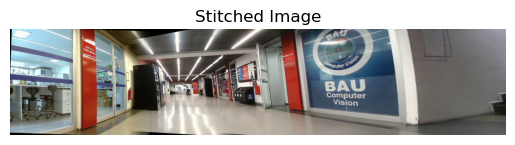

In [227]:


import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 定义输入和输出文件名
input_image1 = "undistorted_image1.png"
input_image2 = "output2.png"
output_image = "output3.png"

# 构建命令
command = ["./image_stitching", input_image1, input_image2, output_image]

# 使用subprocess运行命令
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # print("Command executed successfully.")
    # print("Output:\n", result.stdout.decode())
except subprocess.CalledProcessError as e:
    print("Error occurred while executing the command.")
    print("Error message:\n", e.stderr.decode())
    exit(1)  # 退出程序

# 使用Matplotlib加载和显示输出图片
img = mpimg.imread(output_image)
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.title("Stitched Image")
plt.show()